In [1]:
import pickle
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Import data
with open('rattlesnake_grouped_with_weather.pickle', 'rb') as read_file:
    df = pickle.load(read_file)
    
df.head()

,timestamp,year,month,day,trail_condition,rating,counts,datetime,Sea_Temp-Max,Sea_Temp-Min,...,Sea_Snow_Depth,Ced_Temp-Max,Ced_Temp-Min,Ced_Temp-Avg,Ced_Departure,Ced_Precipitation,Ced_New_Snow,Ced_Snow_Depth,day_of_week,is_weekend
0,2010-01-23,9,1,23,,4.0,1,2010-01-23,49,40,...,0,46.0,37.0,41.5,5.2,0.27,0.0,0.0,Saturday,True
1,2010-02-07,9,2,7,,4.0,1,2010-02-07,49,44,...,0,48.0,38.0,43.0,6.3,0.17,0.0,0.0,Sunday,True
2,2010-02-21,9,2,21,,4.0,2,2010-02-21,57,36,...,0,50.0,30.0,40.0,2.5,0.00,0.0,0.0,Sunday,True
3,2010-03-14,9,3,14,,4.0,1,2010-03-14,53,35,...,0,42.0,29.0,35.5,-4.4,0.00,0.0,0.0,Sunday,True
4,2010-03-20,9,3,20,,4.0,1,2010-03-20,67,37,...,0,56.0,34.0,45.0,4.4,0.00,0.0,0.0,Saturday,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061 entries, 0 to 1060
Data columns (total 24 columns):
timestamp            1061 non-null object
year                 1061 non-null int64
month                1061 non-null int64
day                  1061 non-null int64
trail_condition      1061 non-null object
rating               1061 non-null float64
counts               1061 non-null int64
datetime             1061 non-null datetime64[ns]
Sea_Temp-Max         1061 non-null int64
Sea_Temp-Min         1061 non-null int64
Sea_Temp-Avg         1061 non-null float64
Sea_Departure        1061 non-null float64
Sea_Precipitation    1061 non-null float64
Sea_New_Snow         1061 non-null float64
Sea_Snow_Depth       1061 non-null int64
Ced_Temp-Max         1054 non-null float64
Ced_Temp-Min         1053 non-null float64
Ced_Temp-Avg         1053 non-null float64
Ced_Departure        1053 non-null float64
Ced_Precipitation    1061 non-null float64
Ced_New_Snow         1050 non-null float64

In [7]:
df.describe()

,year,month,day,rating,counts,Sea_Temp-Max,Sea_Temp-Min,Sea_Temp-Avg,Sea_Departure,Sea_Precipitation,Sea_New_Snow,Sea_Snow_Depth,Ced_Temp-Max,Ced_Temp-Min,Ced_Temp-Avg,Ced_Departure,Ced_Precipitation,Ced_New_Snow,Ced_Snow_Depth
count,1061.000000,1061.000000,1061.000000,1061.0,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1054.000000,1053.000000,1053.000000,1053.000000,1061.000000,1050.000000,1053.000000
mean,3.607917,5.729500,15.319510,4.0,1.413761,61.952875,45.644675,53.798775,1.230914,0.065598,0.011404,0.024505,53.406072,39.899335,46.651472,0.090028,0.208926,0.146286,1.199430
std,2.182022,3.297421,9.033099,0.0,0.855261,14.244616,9.954095,11.806430,5.346722,0.188339,0.166291,0.232628,14.711154,9.710414,11.973596,6.179672,0.393824,0.797679,3.376293
min,0.000000,1.000000,1.000000,4.0,1.000000,31.000000,20.000000,25.500000,-18.600000,0.000000,0.000000,0.000000,19.000000,12.000000,16.000000,-20.700000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,7.000000,4.0,1.000000,50.000000,38.000000,44.000000,-1.900000,0.000000,0.000000,0.000000,42.000000,32.000000,37.500000,-4.100000,0.000000,0.000000,0.000000
50%,3.000000,5.000000,15.000000,4.0,1.000000,61.000000,46.000000,53.500000,0.900000,0.000000,0.000000,0.000000,52.000000,40.000000,46.000000,-0.500000,0.000000,0.000000,0.000000
75%,5.000000,8.000000,23.000000,4.0,2.000000,73.000000,54.000000,64.000000,4.300000,0.020000,0.000000,0.000000,65.000000,47.000000,56.500000,3.800000,0.260000,0.000000,0.000000
max,9.000000,12.000000,31.000000,4.0,10.000000,96.000000,69.000000,82.000000,20.900000,2.200000,3.000000,4.000000,87.000000,62.000000,73.500000,21.700000,3.330000,13.000000,18.000000


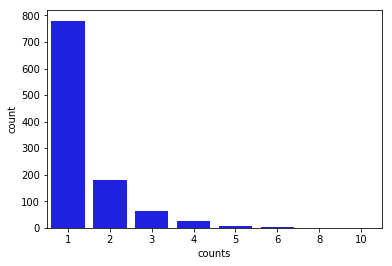

In [4]:
# Distribution of # of counts (our Y)
sns.countplot(x='counts',data=df,color='Blue')

In [32]:
df['counts'].mean()

1.413760603204524

In [5]:
# Convert is_weekend from bool to ints (0 and 1)
df['is_weekend'] = df['is_weekend'].astype(int)
df['is_weekend'].head()

0    1
1    1
2    1
3    1
4    1
Name: is_weekend, dtype: int64

/home/kmussar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


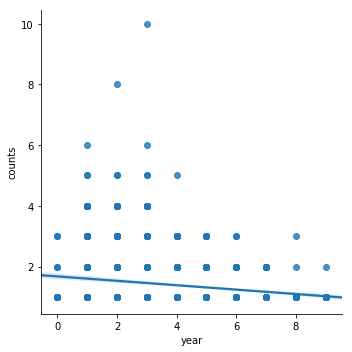

In [6]:
# counts per year
sns.lmplot(x='year',y='counts', data=df)

In [7]:
df.columns

Index(['timestamp', 'year', 'month', 'day', 'trail_condition', 'rating',
       'counts', 'datetime', 'Sea_Temp-Max', 'Sea_Temp-Min', 'Sea_Temp-Avg',
       'Sea_Departure', 'Sea_Precipitation', 'Sea_New_Snow', 'Sea_Snow_Depth',
       'Ced_Temp-Max', 'Ced_Temp-Min', 'Ced_Temp-Avg', 'Ced_Departure',
       'Ced_Precipitation', 'Ced_New_Snow', 'Ced_Snow_Depth', 'day_of_week',
       'is_weekend'],
      dtype='object')

/home/kmussar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/kmussar/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


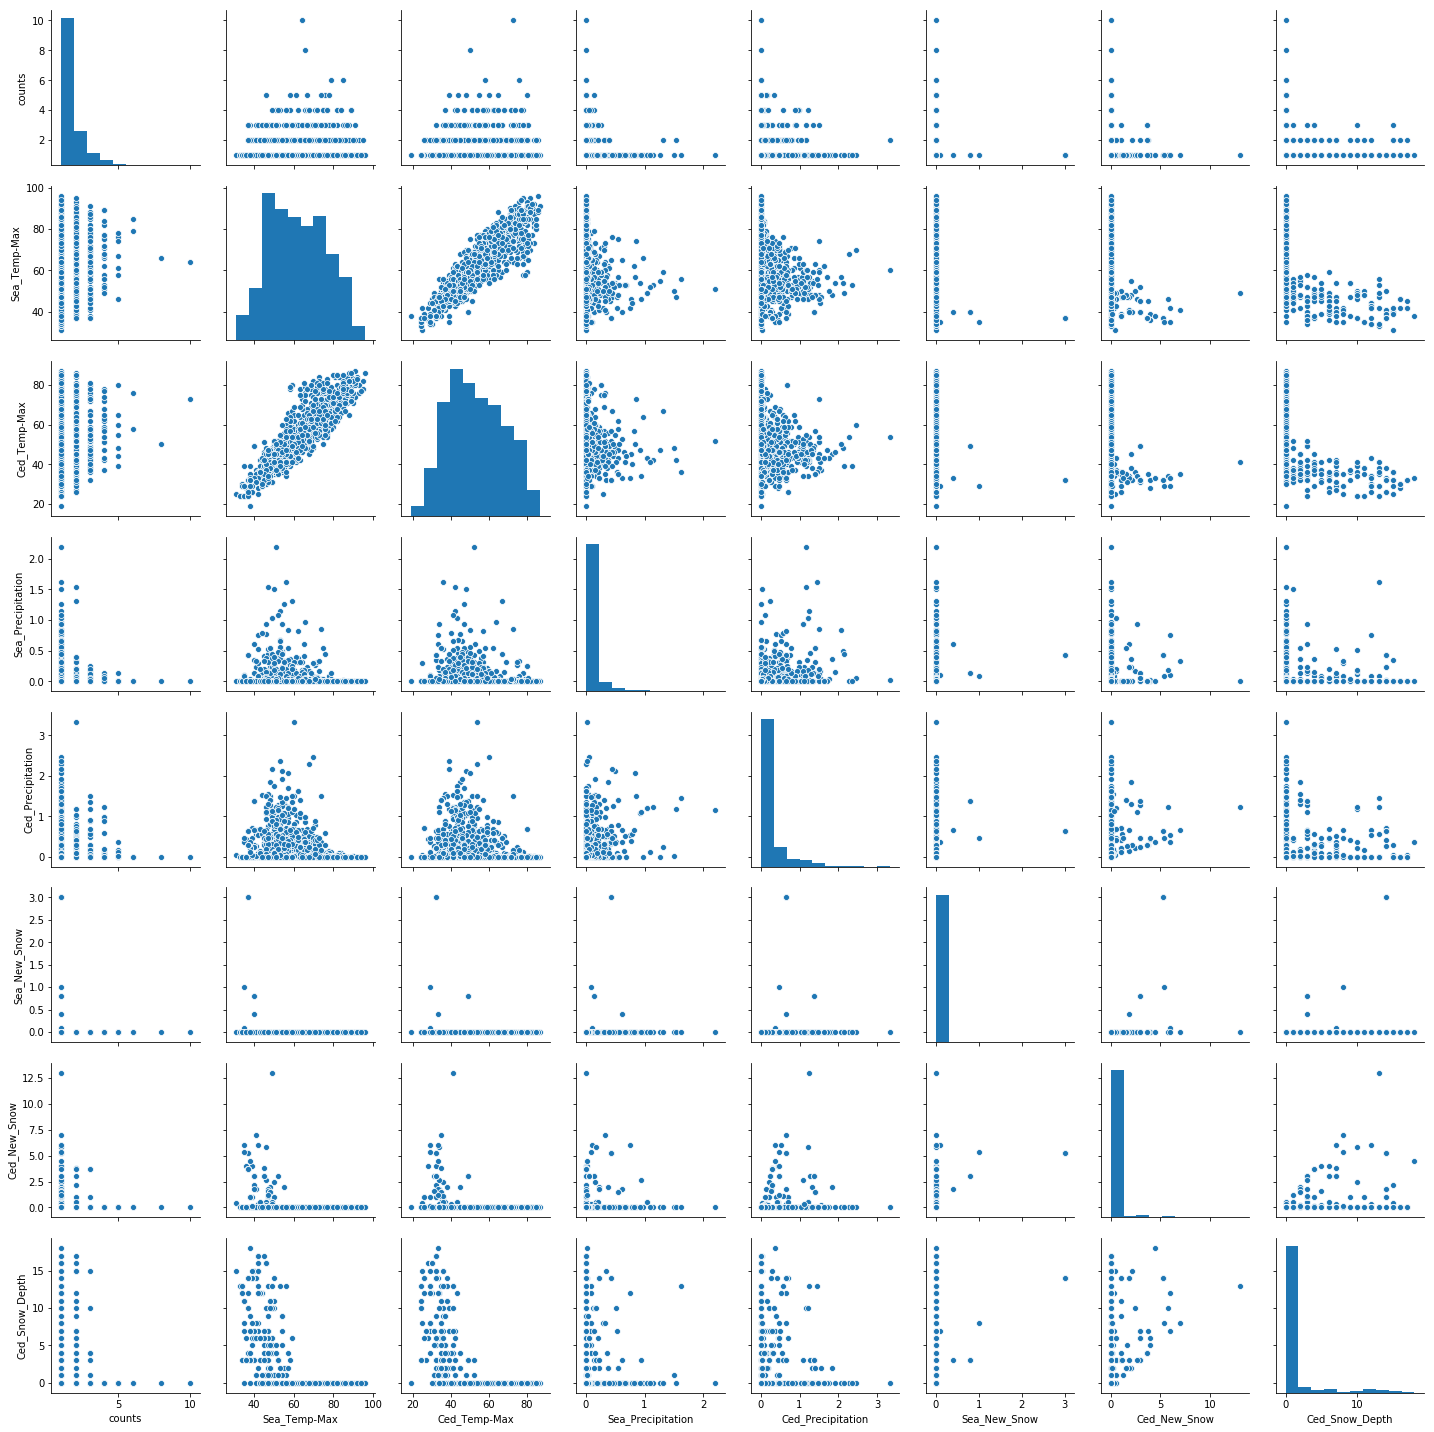

In [21]:
sns.pairplot(data=df[['counts','Sea_Temp-Max','Ced_Temp-Max','Sea_Precipitation','Ced_Precipitation','Sea_New_Snow','Ced_New_Snow', 'Ced_Snow_Depth']])

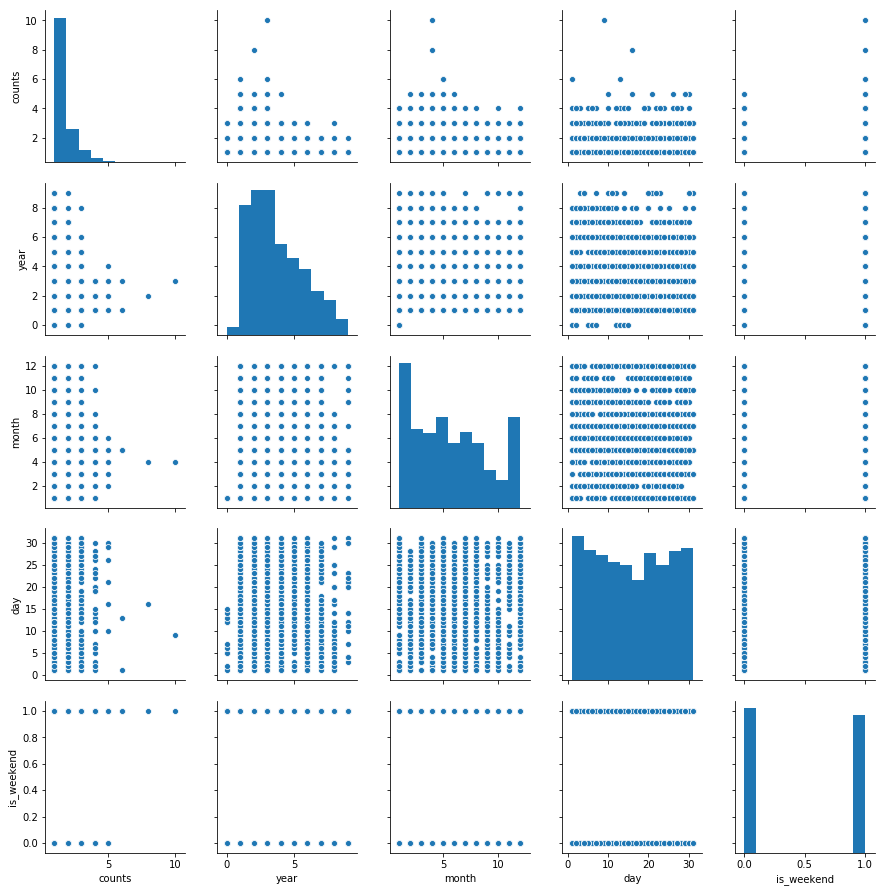

In [6]:
sns.pairplot(data=df[['counts', 'year', 'month', 'day','day_of_week', 'is_weekend']])

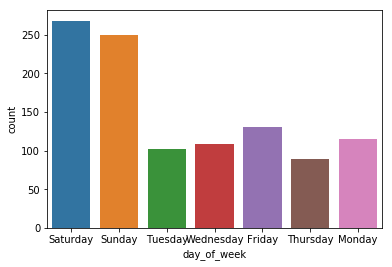

In [24]:
sns.countplot(x='day_of_week',data=df)

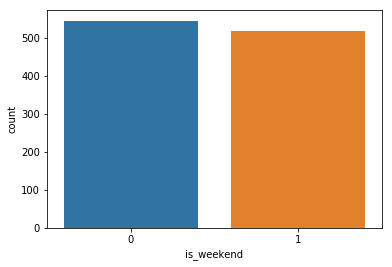

In [7]:
sns.countplot(x='is_weekend',data=df)

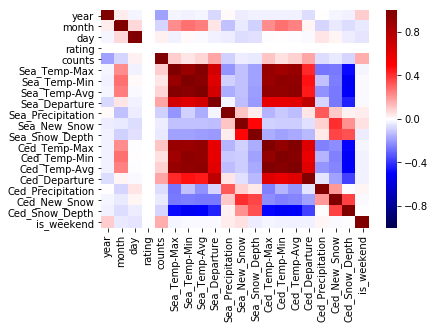

In [36]:
sns.heatmap(df.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

### Train/Validate/Test Split

I'm not sure how to manually split my data so that test data is the most recent, and validation data is the second most recent. Also not sure if I should do this... 

so I will split regularily 

In [11]:
df1 = df.dropna()

In [12]:
X = df1.drop(columns=['counts','timestamp','trail_condition','datetime','day_of_week'],axis=1)
y = df1['counts']

In [17]:
X.columns

Index(['year', 'month', 'day', 'rating', 'Sea_Temp-Max', 'Sea_Temp-Min',
       'Sea_Temp-Avg', 'Sea_Departure', 'Sea_Precipitation', 'Sea_New_Snow',
       'Sea_Snow_Depth', 'Ced_Temp-Max', 'Ced_Temp-Min', 'Ced_Temp-Avg',
       'Ced_Departure', 'Ced_Precipitation', 'Ced_New_Snow', 'Ced_Snow_Depth',
       'is_weekend'],
      dtype='object')

In [13]:
# hold out 20% of the data for final testing
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_val)

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))
print('R^2:', metrics.explained_variance_score(y_val,predictions))

MAE: 0.5714810760663963
MSE: 0.7436853058838326
RMSE: 0.8623719069426095
R^2: 0.1349880427693848


# That's not very good

Text(0, 0.5, 'y_vals')

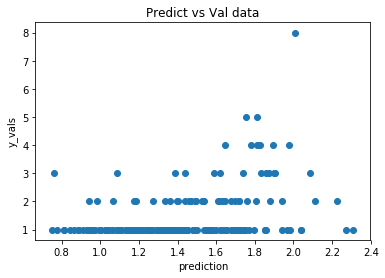

In [18]:
plt.scatter(predictions, y_val)
plt.title("Predict vs Val data")
plt.xlabel("prediction")
plt.ylabel("y_vals")

Text(0, 0.5, 'residuals')

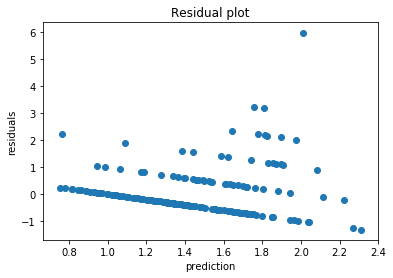

In [19]:
residuals = y_val - predictions
plt.scatter(predictions, residuals)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")

# Simplifed Features: 
* Sea_departure
* is_weekend
* year


In [20]:
df1.columns

Index(['timestamp', 'year', 'month', 'day', 'trail_condition', 'rating',
       'counts', 'datetime', 'Sea_Temp-Max', 'Sea_Temp-Min', 'Sea_Temp-Avg',
       'Sea_Departure', 'Sea_Precipitation', 'Sea_New_Snow', 'Sea_Snow_Depth',
       'Ced_Temp-Max', 'Ced_Temp-Min', 'Ced_Temp-Avg', 'Ced_Departure',
       'Ced_Precipitation', 'Ced_New_Snow', 'Ced_Snow_Depth', 'day_of_week',
       'is_weekend'],
      dtype='object')

In [21]:
X2 = df1[['Sea_Departure', 'year', 'is_weekend']]
y = df1['counts']

In [23]:
X2, X2_test, y2, y2_test = train_test_split(X2, y, test_size=.2, random_state=10)

In [24]:
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2, test_size=.25, random_state=3)

In [25]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)
predictions2 = lr2.predict(X2_val)

In [28]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y2_val, predictions2))
print('MSE:', metrics.mean_squared_error(y2_val, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_val, predictions2)))
print('R^2:', metrics.explained_variance_score(y2_val,predictions2))

MAE: 0.5931764856140099
MSE: 0.776160528253184
RMSE: 0.8809997322662386
R^2: 0.09724630142860868


Text(0, 0.5, 'y_vals')

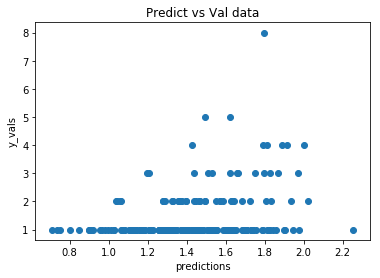

In [29]:
plt.scatter(predictions2, y2_val)
plt.title("Predict vs Val data")
plt.xlabel("predictions")
plt.ylabel("y_vals")

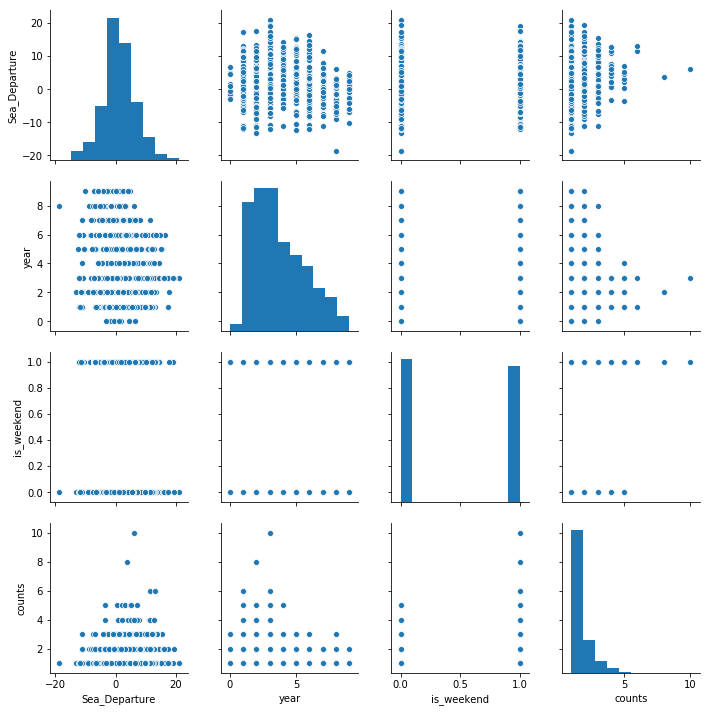

In [31]:
X2_plot = df[['Sea_Departure', 'year', 'is_weekend','counts']]
sns.pairplot(X2_plot)

In [28]:
df = df.sort_values(by='datetime')
print(df.head(2))
print(df.tail(2))

    timestamp  year  month  day trail_condition  rating  counts   datetime  \
0  2010-01-23     9      1   23                     4.0       1 2010-01-23   
1  2010-02-07     9      2    7                     4.0       1 2010-02-07   

   Sea_Temp-Max  Sea_Temp-Min     ...      Sea_Snow_Depth  Ced_Temp-Max  \
0            49            40     ...                   0          46.0   
1            49            44     ...                   0          48.0   

   Ced_Temp-Min  Ced_Temp-Avg  Ced_Departure  Ced_Precipitation  Ced_New_Snow  \
0          37.0          41.5            5.2               0.27           0.0   
1          38.0          43.0            6.3               0.17           0.0   

   Ced_Snow_Depth  day_of_week  is_weekend  
0             0.0     Saturday        True  
1             0.0       Sunday        True  

[2 rows x 24 columns]
       timestamp  year  month  day   trail_condition  rating  counts  \
1059  2019-01-14     0      1   14  trail conditions     4.0     